In [63]:
import pandas as pd
import numpy as np
import os

In [64]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [65]:
train_df=pd.read_csv("D:\\machine learning projecsts folders\\realstate\\gurgoan clean data.csv")

In [66]:
train_df.isnull().sum()

property_type         1
society             488
sector                0
price                19
rate                 19
area                 19
areaWithType          1
bedRoom               1
bathroom              1
balcony               1
additionalRoom        1
noOfFloor            20
facing             1106
agePossession         2
nearbyLocations     178
furnishDetails      982
features            636
dtype: int64

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3803 non-null   object 
 1   society          3316 non-null   object 
 2   sector           3804 non-null   object 
 3   price            3785 non-null   float64
 4   rate             3785 non-null   float64
 5   area             3785 non-null   float64
 6   areaWithType     3803 non-null   object 
 7   bedRoom          3803 non-null   float64
 8   bathroom         3803 non-null   float64
 9   balcony          3803 non-null   object 
 10  additionalRoom   3803 non-null   object 
 11  noOfFloor        3784 non-null   object 
 12  facing           2698 non-null   object 
 13  agePossession    3802 non-null   object 
 14  nearbyLocations  3626 non-null   object 
 15  furnishDetails   2822 non-null   object 
 16  features         3168 non-null   object 
dtypes: float64(5),

In [68]:
train_df.sample(2)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features
185,Flat,capital residences 360,sector 70a,1.66,8400.0,1976.0,Super Built up area 1976(183.58 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3.0,3.0,3+,servant room,8,East,0 to 1 Year Old,NaN,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3392,House,NaN,sector 14,4.60,20444.0,2250.0,Built Up area: 2250 (209.03 sq.m.),1.0,1.0,No,not available,1.0,NaN,undefined,"['Hsbc bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Punjab national bank ATM', 'Nagpal Nursing Home Gurgaon', 'Kalyani Hospital Gurgaon', 'Saraswati Hospital Gurgaon', 'Apollo Cradle Hospital Gurgaon', 'Kishor Clinic', 'Sheetla Clinic', 'Sangwan Hospital Gurgaon', 'Dr. Babita Sharma', 'Lotus Hospital Gurgaon', 'Nidhi Clinic', 'Children Hospital', 'Mamta Hospital Gurgaon', 'Dr. Tomar Clinic', 'Jeevan Jyoti Hospital Gurgaon', 'Ahmed Hospital Multi Speciality', 'Shivam Hospital Gurgaon', 'Sector-14 Market', 'Indian Oil', 'Standard chartered bank', 'Icici bank', 'Hdfc bank', 'Oriental bank of commerce', 'Karur vysay bank', 'Catholic syrian bank', 'State bank of india sbi', 'Punjab national bank', 'Rang Parivartan', 'Cafe Coffee Day', '32nd Milestone', 'Dhabba', 'Cafe Coffee Day', 'Ardor 29', 'ADDA', 'Gung the palace Korean restaurant', 'Tocpao', 'Walking Street', 'Spaghetti Kitchen & Bar', 'Pizza Hut', 'Swagath', 'distillery', ""Hops 'N' Brew"", ""Domino's Pizza"", 'Salvan Public School', 'Management Development Institute', 'Lieutenant Atul Kataria School', 'govt sec school']",NaN,NaN


In [69]:
# # in this file we are going to work on
# 1. areaWithtype
# 2. additonal room
# 3.age procession
# 4. furnish detalis 
# 5.features 

# areaWithType

In [70]:
train_df[train_df['areaWithType'].isnull()]

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features
3803,NaN,NaN,sector 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
train_df=train_df[~train_df['areaWithType'].isnull()]

In [72]:
train_df[train_df['areaWithType'].isnull()]

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features


In [73]:
train_df.shape

(3803, 17)

In [74]:
train_df[['area','areaWithType']].head()

,area,areaWithType
0,1967.0,Carpet area: 1967 (182.74 sq.m.)
1,1640.0,Super Built up area 1640(152.36 sq.m.)
2,505.0,Carpet area: 505 (46.92 sq.m.)
3,1816.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1817 sq.ft. (168.8 sq.m.)Carpet area: 1816 sq.ft. (168.71 sq.m.)
4,2093.0,Super Built up area 2093(194.45 sq.m.)


In [75]:
train_df['areaWithType'].value_counts()

areaWithType
Plot area 360(301.01 sq.m.)                                                                                                     37
Plot area 300(250.84 sq.m.)                                                                                                     26
Plot area 200(167.23 sq.m.)                                                                                                     19
Plot area 502(419.74 sq.m.)                                                                                                     19
Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)                                                   17
Super Built up area 1350(125.42 sq.m.)                                                                                          17
Super Built up area 1578(146.6 sq.m.)                                                                                           17
Plot area 270(225.75 sq.m.)                                           

In [76]:
# # the area of a flat and ahouse is divided intothree types 
# 1. super built up
# 2.built up/ploat area 
# 3. carpet area 

In [77]:
import re
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [78]:
def buitup(a,area_type):
    match=re.search(area_type+ r'\s*:*\s*(\d+\.?\d*)',a)
    if match:
        return float(match.group(1))
    return None

In [79]:
train_df['super_built_up_area'] = train_df['areaWithType'].apply(get_super_built_up_area)
train_df['built_up_area'] = train_df['areaWithType'].apply(lambda x:buitup(x,'Built Up area'))
train_df['Carpet area'] = train_df['areaWithType'].apply(lambda x:buitup(x,'Carpet area'))
train_df['built_up_area'] = train_df['areaWithType'].apply(lambda x:buitup(x,'Plot area'))
# we have changed the ploat are to the buld up area too

In [80]:
train_df.sample(5)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,Carpet area
831,House,NaN,sector 14,6.46,18889.0,3420.0,Plot area 380(317.73 sq.m.)Built Up area: 380 sq.yards (317.73 sq.m.)Carpet area: 300 sq.yards (250.84 sq.m.),5.0,5.0,2,"pooja room,study room,servant room",3.0,East,5 to 10 Year Old,"['Sheetla Mata Mandir', 'Hsbc bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Punjab national bank ATM', 'Citi bank ATM', 'Nagpal Nursing Home Gurgaon', 'Apollo Cradle Hospital Gurgaon', 'Kishor Clinic', 'Kalyani Hospital Gurgaon', 'Sheetla Clinic', 'Sangwan Hospital Gurgaon', 'Saraswati Hospital Gurgaon', 'Dr. Babita Sharma', 'Children Hospital', 'Nidhi Clinic', 'Jeevan Jyoti Hospital Gurgaon', 'Dr. Tomar Clinic', 'Lotus Hospital Gurgaon', 'Mamta Hospital Gurgaon', 'Sector-14 Market', 'Indian Oil', 'Standard chartered bank', 'Icici bank', 'Hdfc bank', 'Oriental bank of commerce', 'Karur vysay bank', 'Catholic syrian bank', 'State bank of india sbi', 'Rang Parivartan', 'Cafe Coffee Day', 'Dhabba', '32nd Milestone', 'Cafe Coffee Day', 'Ardor 29', 'ADDA', 'Gung the palace Korean restaurant', 'Walking Street', 'Swagath', 'Tocpao', 'Spaghetti Kitchen & Bar', 'distillery', 'Pizza Hut', ""Hops 'N' Brew"", 'KFC', ""Domino's Pizza"", ""McDonald's"", 'Salvan Public School', 'Management Development Institute', 'Lieutenant Atul Kataria School']","['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '6 Geyser', '10 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,380.0,300.0
2522,Flat,m3m skywalk,sector 74,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1124 sq.ft. (104.42 sq.m.),2.0,2.0,3+,others,18,South,1 to 5 Year Old,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1406.0,NaN,1124.0
2516,Flat,alpha corp gurgaonone,sector 84,2.24,6523.0,3434.0,Super Built up area 3434(319.03 sq.m.)Carpet area: 2900 sq.ft. (269.42 sq.m.),4.0,4.0,3,servant room,12,West,1 to 5 Year Old,"['Delhi Public School', 'Raheja Market', 'Sapphire Mall', 'INXT High Street', 'Cambridge Pre-School', 'Euro Int. School', 'Genesis Hospital', 'HDFC Bank', 'Society Park', 'Dishoom Cinemas']",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Visitor Parking']",3434.0,NaN,2900.0
3618,Flat,senate court,sector 62,0.90,14084.0,639.0,Built Up area: 639 (59.37 sq.m.),1.0,1.0,No,not available,0,NaN,undefined,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'Standard chartered ATM', 'Icici bank ATM', 'State bank ATM', 'Vatsalya Clinic', 'Anand Hospital Gurgaon', 'pracksht hospital', 'Kriti Hospital', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Surgicare Hospital Gurgaon', 'Skin Clinic', 'Divine Look Clinic Centre', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Vishesh Dental', 'Neelkanth Health Care', 'Park Hospital Gurgaon', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Wembley estate club', 'HUDA Office Complex', 'Medi

In [81]:
# some of the area preesnt inside the area columns is consist of sqmeter and  sqft and more so we need to assin the value in the same order 

In [82]:
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [83]:
train_df['super_built_up_area'] = train_df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)
train_df['built_up_area'] = train_df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)
train_df['Carpet area'] = train_df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['Carpet area']), axis=1)


In [84]:
train_df.sample(4)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,Carpet area
683,House,international city by sobha phase 1,sector 109,5.70,10556.0,5400.0,Plot area 600(501.68 sq.m.),4.0,5.0,3+,"study room,pooja room,servant room,store room",3.0,East,1 to 5 Year Old,"['Dwarka sector 21 metro station', 'Pacific D21 Mall', 'Dharampeth Main Road', 'Dwarka Expressway', 'The Shikshiyan School', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi International Airport', 'Gurgaon railway station', 'The Executive Centre', 'Luxus Haritma Resort', ""Oyster's Water Park"", 'BSF Golf Course']","['8 Wardrobe', '11 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,600.0,NaN
1583,Flat,the roselia 2,sector 95,0.45,6475.0,695.0,Built Up area: 695 (64.57 sq.m.)Carpet area: 595 sq.ft. (55.28 sq.m.),2.0,2.0,2,not available,19,North,undefined,NaN,NaN,NaN,NaN,NaN,595.0
473,Flat,shapoorji pallonji joyville gurugram,sector 102,1.35,14754.0,915.0,Super Built up area 915(85.01 sq.m.),2.0,2.0,2,not available,10,NaN,Sep 2023,"['Khan Market', 'The Esplanade Mall', 'Dwarka Expressway', 'Garhi Road', 'Delhi Public School', 'SGT University', 'Aryan Hospital', 'Indira Gandhi Int. Airport', 'Basai Dhankot', 'The Executive Centre', 'Inde Hotels & Resorts', 'Appu Ghar', 'DLF Golf and Country Club']","['3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Park', 'Visitor Parking']",915.0,NaN,NaN
2164,Flat,kendriya vihar,sector 56,0.55,9016.0,610.0,Carpet area: 610 (56.67 sq.m.),1.0,2.0,1,not available,0,NaN,10+ Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'pracksht hospital', 'Surgicare Hospital Gurgaon', 'Arunodaya Deseret Eye Hospital', 'Vatsalya Clinic', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'Hdfc bank', 'Kotak mahindra bank', 'State bank of india', 'Indusind bank', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', '222', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Madison and Pike', 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School', 'Gurugram University']",NaN,"['Power Back-up', 'Security / Fire Alarm', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,610.0


# additona;room -->

In [85]:
train_df['additionalRoom'].isnull().sum()

np.int64(0)

In [86]:
train_df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [87]:
# Store Room,Servant Room,Study Room,Others,Pooja Room 
# these are the main type avalabein the additonal roooom


In [88]:
encord=train_df['additionalRoom'].str.get_dummies(sep=',')
train_df=train_df.join(encord)

In [89]:
train_df.sample()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,Carpet area,not available,others,pooja room,servant room,store room,study room
3497,Flat,ireo skyon,sector 60,3.0,12484.0,2403.0,Super Built up area 2403(223.25 sq.m.)Built Up area: 2400 sq.ft. (222.97 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),3.0,3.0,3,servant room,5,North-East,1 to 5 Year Old,"['Sector 55-56 Metro', 'Golf Course Extension', 'Adarsh Senior Secondary School', 'Swastik Hospital Sec 66', 'IGI Airport', 'Surajgarh Gurgaon, Golf Course Ext Rd', 'International Tech Park Gurgaon,']","['4 Wardrobe', '1 Water Purifier', '1 Exhaust Fan', '5 Geyser', '16 Light', '1 Modular Kitchen', '5 AC', '1 Curtains', '1 Chimney', 'No Bed', 'No Dining Table', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2403.0,NaN,2200.0,0,0,0,1,0,0


In [90]:
train_df.drop(columns=['not available','additionalRoom'],inplace=True)

In [91]:
train_df.head()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room
0,Flat,tulip violet,sector 69,2.00,10167.0,1967.0,Carpet area: 1967 (182.74 sq.m.),4.0,4.0,1,12,NaN,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Rain Water Harvesting']",NaN,NaN,1967.0,0,0,0,0,0
1,Flat,ss the leaf,sector 85,1.30,7926.0,1640.0,Super Built up area 1640(152.36 sq.m.),2.0,2.0,2,17,NaN,0 to 1 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']",[],"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1640.0,NaN,NaN,0,0,0,0,0
2,Flat,tulsiani easy in homes,sohna road,0.40,7920.0,505.0,Carpet area: 505 (46.92 sq.m.),2.0,2.0,3,9,NaN,Under Construction,"['Huda City Metro', 'Golf Course extn road', 'Rajiv Chowk', 'IGI Airport', 'IMT Sohna', 'Damdama Lake']",NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,505.0,0,0,0,0,0
3,Flat,dlf regal gardens,sector 90,1.29,7103.0,1816.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1817 sq.ft. (168.8 sq.m.)Carpet area: 1816 sq.ft. (168.71 sq.m.),3.0,3.0,3+,12,South-East,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']","['1 Exhaust Fan', '3 Geyser', '7 Light', '5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1818.0,NaN,1816.0,0,0,1,0,0
4,Flat,the close north,sector 50,2.50,11944.0,2093.0,Super Built up area 2093(194.45 sq.m.),3.0,3.0,3,11,North-East,1 to 5 Year Old,"['Sector 55-56 Metro Station', 'Eros City Square', 'Golf Course Ext Road', 'Badshapur Sohna Highway', 'Lotus Valley International School', 'Sushant University', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Basai Dhankot 

# additionalRoom

in this data we will make a function assin the value to old new and other values according to the age gap betwween them 


In [92]:
train_df['agePossession'].isnull().sum()

np.int64(1)

In [93]:
train_df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
Oct 2023                 4
Jul 2024                 4
Aug 2024                 4
By 2025                  4
Sep 2023                 4
May 2024                 3
Jan 2025                 3
Feb 2024                 3
Nov 2024                 3
Aug 2025                 2
Apr 2026                 2
Jul 2025                 2
Dec 2026                 2
Jun 2027                 2
By 2027                  2
Sep 2025                 2
Mar 2025                 2
Jan 2026      

In [94]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"
train_df['agePossession'] = train_df['agePossession'].apply(categorize_age_possession)

In [95]:
train_df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [96]:
train_df.sample(4)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room
810,House,NaN,sector 57,3.15,20349.0,1548.0,Plot area 172(143.81 sq.m.),5.0,4.0,3+,2.0,North-East,Moderately Old,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'State bank ATM', 'Icici bank ATM', 'Standard chartered ATM', 'Vatsalya Clinic', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'pracksht hospital', 'Meher Clinic', 'Bones Clinic - Orthopaedics', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Dr. Naresh Pandita', 'Arihant Hospital', 'Dr. Anuj Sharma', 'Wembley estate club', 'HUDA Office Complex', 'Medisca', 'Pernod Ricard Charitable Dispensary', 'SPAZE BUSINESS PARK', 'Unitech', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank', 'Hdfc bank and atm', 'Hdfc bank', '222', 'Pizza Hut', 'Madison and Pike', 'India', 'Haldiram', 'Raj Restaurant', 'Gurugram University', 'Kamla International', 'Amity Global School', 'St. Angels Sr', 'Manav Rachna School', 'Delhi Public School Primary Section', 'IILM', 'St. Angels Jr', 'Iilm University', 'Manav Rachna Swimming Pool']","['3 Wardrobe', '8 Fan', '30 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Recently Renovated', 'Visitor Parking', 'Natural Light', 'Airy Rooms']",NaN,172.0,NaN,0,0,0,1,0
38,Flat,uphaar residency 2,sector 105,0.42,5600.0,750.0,Carpet area: 750 (69.68 sq.m.),3.0,2.0,1,0,East,Moderately Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Chirag Hospital Pvt. Ltd', 'R K Hospital Gurgaon', 'Bhardwaj Hospital', 'Dr. Hitesh Dawar', 'Jiya Clinic', 'Dr. Mittal Clinic', 'Sneh Hospital Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Kalyan Hospital Gurgaon', 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Aryan Hospital', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'Pizza Hut', ""McDonald's"", 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Water Purifier', '1 Chimney', '1 Sofa', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Lift(s)', 'Water Storage']",NaN,NaN,750.0,1,0,0,0,0
307,Flat,experion windchants,sector 112,2.50,13888.0,1800.0,Super Built up area 2441(226.78 sq.m.)Built Up area: 1939.03 sq.ft. (180.14 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),2.0,2.0,3,10,East,Relatively New,"['Ansal Plaza', 'Dwaraka Expressway', 'First Step Play School', 'Sri Ma Montessori International', 'Jai Sai Ram Hospital', 'Park Hospital', 'IGI Airport', 'Gurgaon Railway Station']","['4 Fan', '1 Exhaust Fan', '2 Geyser', '4 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate

In [97]:
all_furnishings = []
for detail in train_df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    train_df[furnishing] = train_df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = train_df[['furnishDetails'] + columns_to_include]

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\karan\AppData\Local\Temp\ipykernel_22500\2059678674.py:12: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [98]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\karan\AppData\Local\Temp\ipykernel_22500\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [99]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

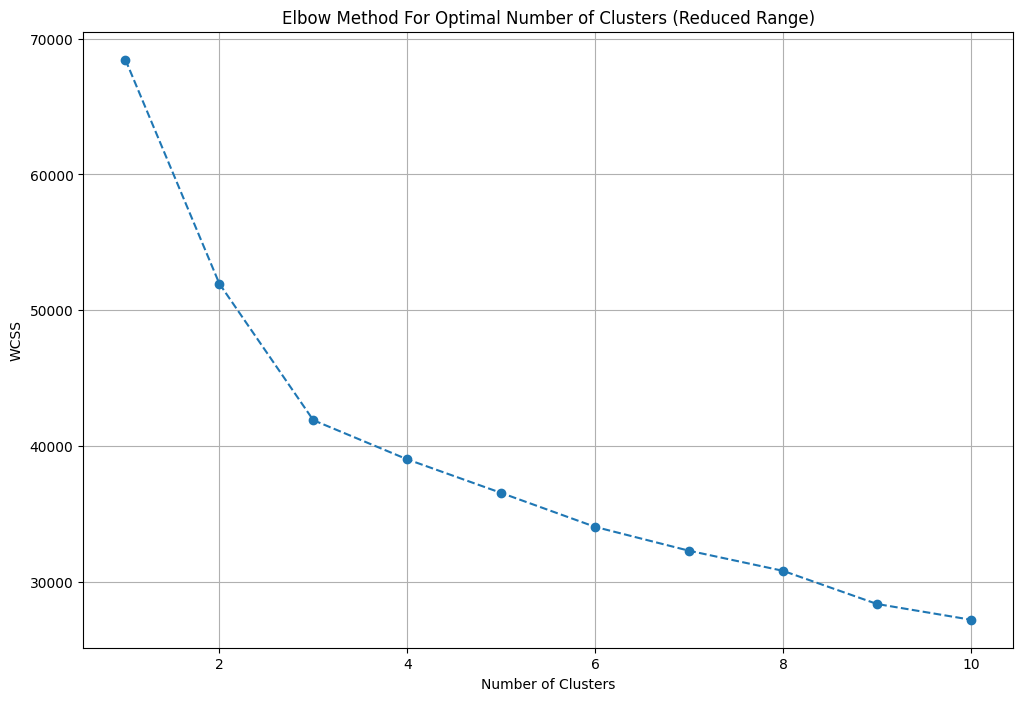

In [100]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [101]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [102]:
df = train_df.iloc[:,:-18]
df['furnishing_type'] = cluster_assignments
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
37,NaN,0
1260,NaN,0
3553,"['6 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '17 Light', '6 AC', '1 Chimney', '7 Curtains', '1 Modular Kitchen', '3 Wardrobe', '1 Microwave', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
29,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Microwave', '22 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
1010,"['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Stove', '12 Light', '5 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', '1 TV', '3 Wardrobe', '1 Sofa', '1 Microwave', 'No Bed', 'No Washing Machine']",1


In [103]:
app_df=pd.read_csv("D:\\machine learning projecsts folders\\realstate\\appartments.csv")

In [104]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [105]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()
temp_df = df[df['features'].isnull()]

In [106]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']
df.loc[temp_df.index,'features'] = x.values
df['features'].isnull().sum()

np.int64(481)

In [107]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [108]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [109]:
df['luxury_score'] = luxury_score

In [110]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list'],inplace=True)
df.sample(5)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
1102,Flat,pyramid urban,sector 67a,0.62,11854.0,523.0,Carpet area: 523 (48.59 sq.m.),2.0,2.0,2,2,South,Relatively New,NaN,NaN,523.0,0,0,0,0,0,0,64
3314,House,unitech greenwood city,sector 45,NaN,NaN,NaN,Plot area 240(200.67 sq.m.),9.0,9.0,3+,3.0,South-East,Relatively New,NaN,240.0,NaN,0,0,1,0,1,1,110
2098,Flat,indiabulls centrum park,sector 103,1.90,5681.0,3344.0,Carpet area: 3344 (310.67 sq.m.),3.0,4.0,3+,10,North-East,Relatively New,NaN,NaN,3344.0,1,1,1,0,1,2,49
2539,Flat,vatika inxt floors,sector 82a,1.25,8333.0,1500.0,Carpet area: 1500 (139.35 sq.m.),3.0,2.0,3,2,North,Relatively New,NaN,NaN,1500.0,0,1,0,0,1,2,94
2889,Flat,godrej,sector 79,1.18,8532.0,1383.0,Super Built up area 1383(128.48 sq.m.),2.0,2.0,3,7,North-West,Relatively New,1383.0,NaN,NaN,0,0,0,0,0,0,158


In [111]:
df.shape

(3803, 23)

In [112]:
df.sample()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
1592,House,NaN,sector 46,2.2,24202.0,909.0,Plot area 101(84.45 sq.m.),3.0,3.0,2,3.0,North-West,Old Property,NaN,101.0,NaN,0,0,0,1,0,2,56


In [113]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)